In [43]:
from sklearn.datasets import fetch_california_housing

In [44]:
california = fetch_california_housing()

In [45]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [46]:
california.data.shape

(20640, 8)

In [47]:
california.target.shape

(20640,)

In [48]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [49]:
import pandas as pd

In [50]:
pd.set_option('precision', 4)

In [51]:
pd.set_option('max_columns', 9)
pd.set_option('display.width', None)

In [52]:
california_df = pd.DataFrame(california.data, columns=california.feature_names)

In [53]:
california_df['MedHouseValue'] = pd.Series(california.target)

In [54]:
california_df.head

<bound method NDFrame.head of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0    6.9841     1.0238       322.0    2.5556     37.88   
1      8.3014      21.0    6.2381     0.9719      2401.0    2.1098     37.86   
2      7.2574      52.0    8.2881     1.0734       496.0    2.8023     37.85   
3      5.6431      52.0    5.8174     1.0731       558.0    2.5479     37.85   
4      3.8462      52.0    6.2819     1.0811       565.0    2.1815     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0    5.0455     1.1333       845.0    2.5606     39.48   
20636  2.5568      18.0    6.1140     1.3158       356.0    3.1228     39.49   
20637  1.7000      17.0    5.2055     1.1201      1007.0    2.3256     39.43   
20638  1.8672      18.0    5.3295     1.1719       741.0    2.1232     39.43   
20639  2.3886      16.0    5.2547     1.1623      1387.0    2.6170     39.37   

       Lo

In [55]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000
mean,3.8707,28.6395,5.4290,1.0967,1425.4767,3.0707,35.6319,-119.5697,2.0686
std,1.8998,12.5856,2.4742,0.4739,1132.4621,10.3860,2.1360,2.0035,1.1540
min,0.4999,1.0000,0.8462,0.3333,3.0000,0.6923,32.5400,-124.3500,0.1500
25%,2.5634,18.0000,4.4407,1.0061,787.0000,2.4297,33.9300,-121.8000,1.1960
50%,3.5348,29.0000,5.2291,1.0488,1166.0000,2.8181,34.2600,-118.4900,1.7970
75%,4.7432,37.0000,6.0524,1.0995,1725.0000,3.2823,37.7100,-118.0100,2.6472
max,15.0001,52.0000,141.9091,34.0667,35682.0000,1243.3333,41.9500,-114.3100,5.0000


In [56]:
sample_df = california_df.sample(frac=0.1, random_state=17)

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
sns.set(font_scale=2)
sns.set_style('whitegrid')

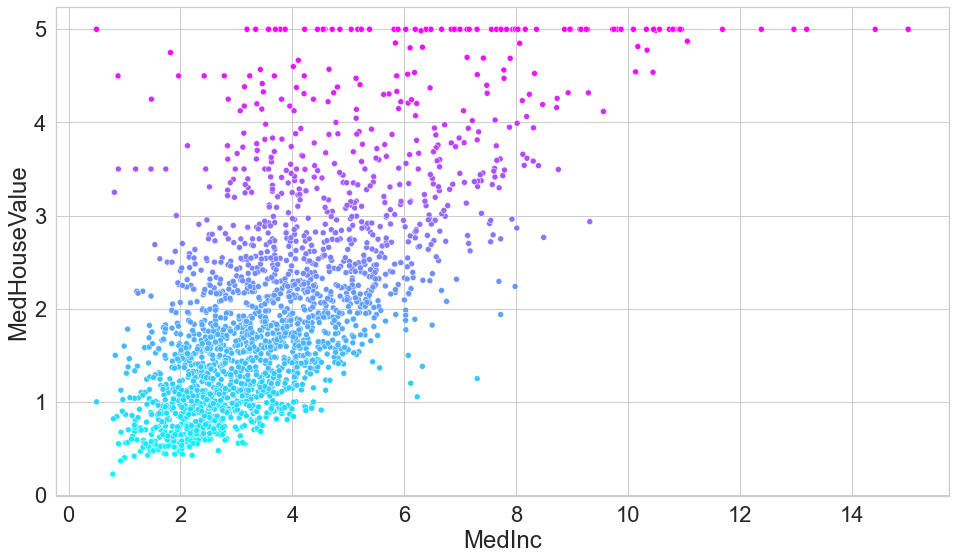

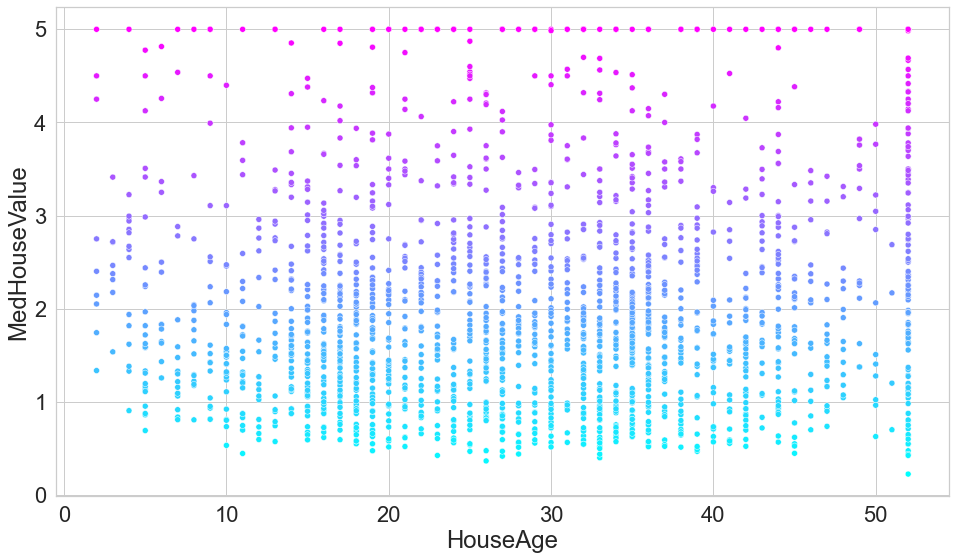

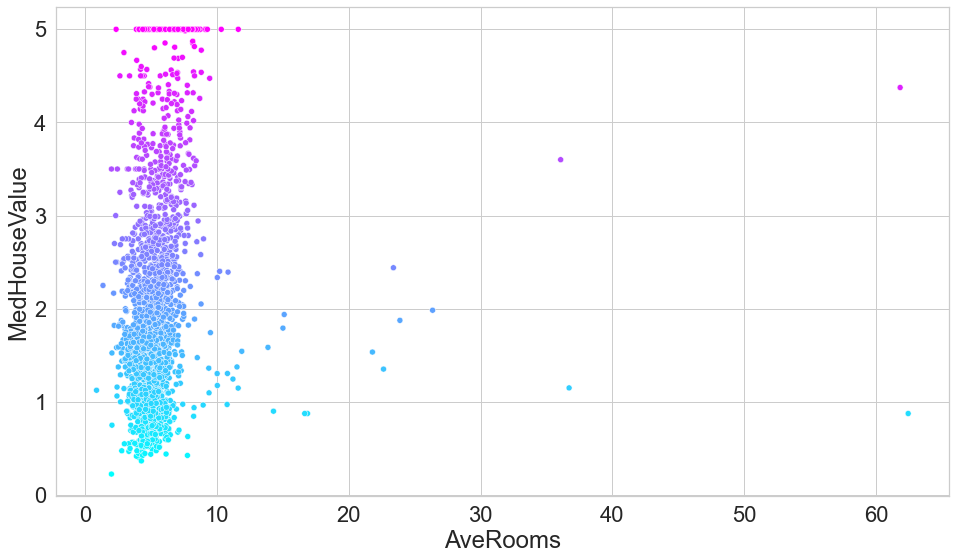

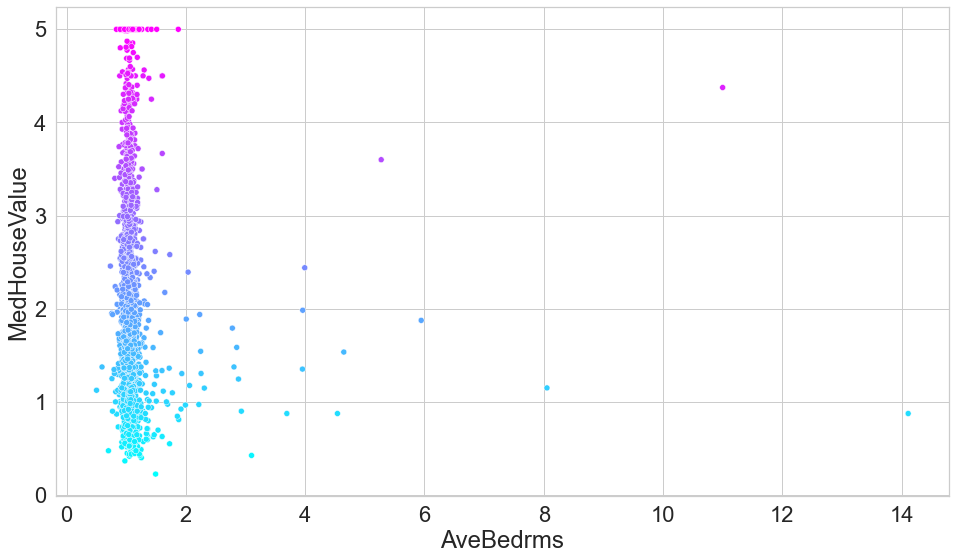

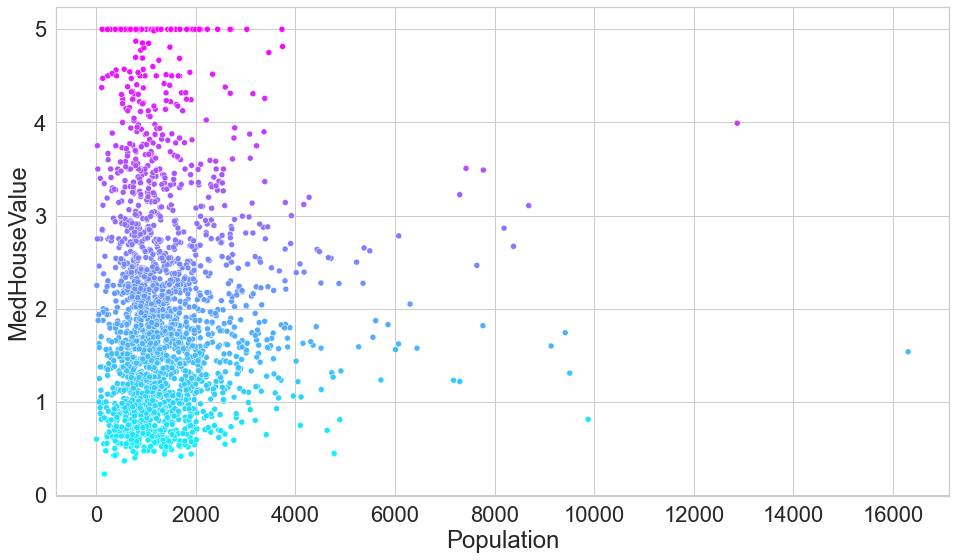

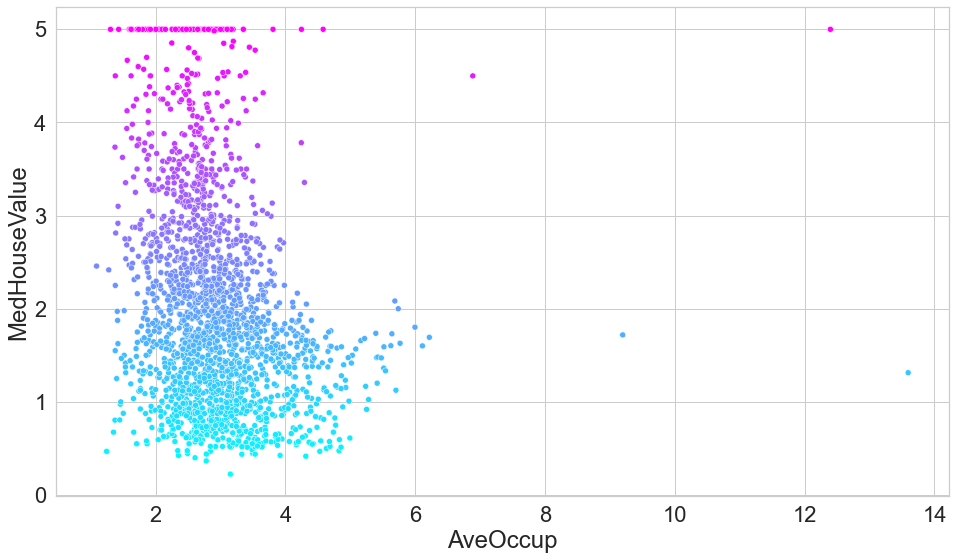

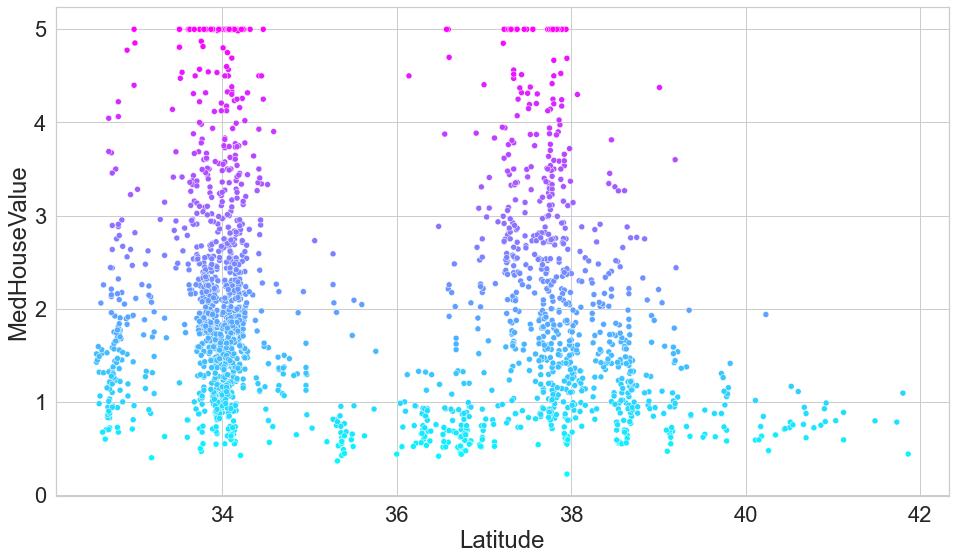

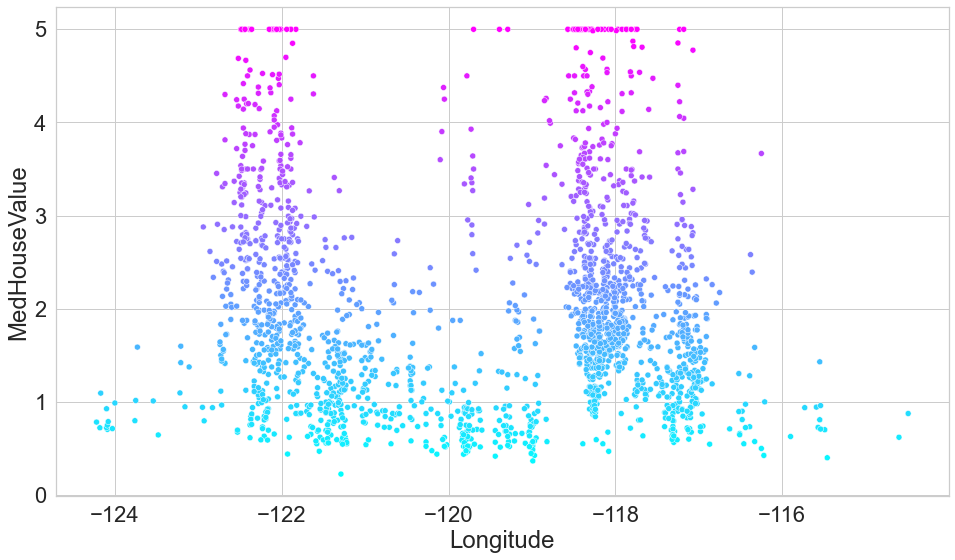

In [59]:
for feature in california.feature_names:
    plt.figure(figsize=(16, 9))
    sns.scatterplot(data=sample_df, x=feature, y='MedHouseValue', hue='MedHouseValue', palette='cool', legend=False)

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, random_state=11)

In [62]:
X_train.shape

(15480, 8)

In [63]:
X_test.shape

(5160, 8)

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
linear_regression = LinearRegression()

In [66]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [67]:
for i, name in enumerate(california.feature_names):
    print(f'{name:>10}: {linear_regression.coef_[i]}')

    MedInc: 0.4377030215382207
  HouseAge: 0.009216834565797805
  AveRooms: -0.10732526637360953
 AveBedrms: 0.6117133073918067
Population: -5.75682200931564e-06
  AveOccup: -0.003384566465716353
  Latitude: -0.41948186096490636
 Longitude: -0.4337713349874019


In [68]:
predicted = linear_regression.predict(X_test)
expected = y_test

In [69]:
predicted[:5]

array([1.25396876, 2.34693107, 2.03794745, 1.8701254 , 2.53608339])

In [70]:
expected[:5]

array([0.762, 1.732, 1.125, 1.37 , 1.856])

In [71]:
df = pd.DataFrame()

In [72]:
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

In [73]:
figure = plt.figure(figsize=(9,9))

<Figure size 648x648 with 0 Axes>

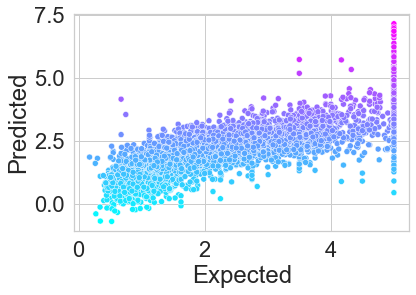

In [74]:
axes = sns.scatterplot(data=df, x='Expected', y='Predicted', hue='Predicted', palette='cool', legend=False)


In [75]:
start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())

In [76]:
axes.set_xlim(start, end)

(-0.6830978604144491, 7.155719818496856)

In [77]:
axes.set_ylim(start,end)

(-0.6830978604144491, 7.155719818496856)

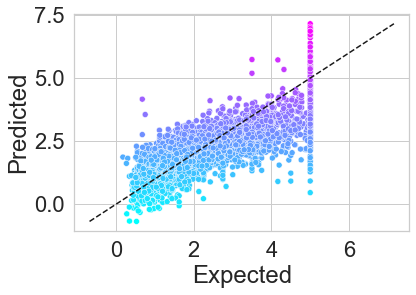

In [78]:
axes = sns.scatterplot(data=df, x='Expected', y='Predicted', hue='Predicted', palette='cool', legend=False)
line = plt.plot([start,end], [start,end], 'k--')

In [79]:
from sklearn import metrics

In [80]:
metrics.r2_score(expected, predicted)

0.600898311596433

In [81]:
metrics.mean_squared_error(expected, predicted)

0.5350149774449121

In [82]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

In [83]:
estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet' : ElasticNet(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge()
}

In [84]:
from sklearn.model_selection import KFold, cross_val_score

In [85]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, X=california.data, y=california.target, cv=kfold, scoring='r2')
    print(f'{estimator_name:>16}: ' +
          f'mean of r2 scores={scores.mean():.3f}')

LinearRegression: mean of r2 scores=0.599
      ElasticNet: mean of r2 scores=0.423
           Lasso: mean of r2 scores=0.285
           Ridge: mean of r2 scores=0.599


In [86]:
import seaborn as sns

In [87]:
sns.set_style('whitegrid')

C:\Users\gamer\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\gamer\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\gamer\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\gamer\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\gamer\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\gamer\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

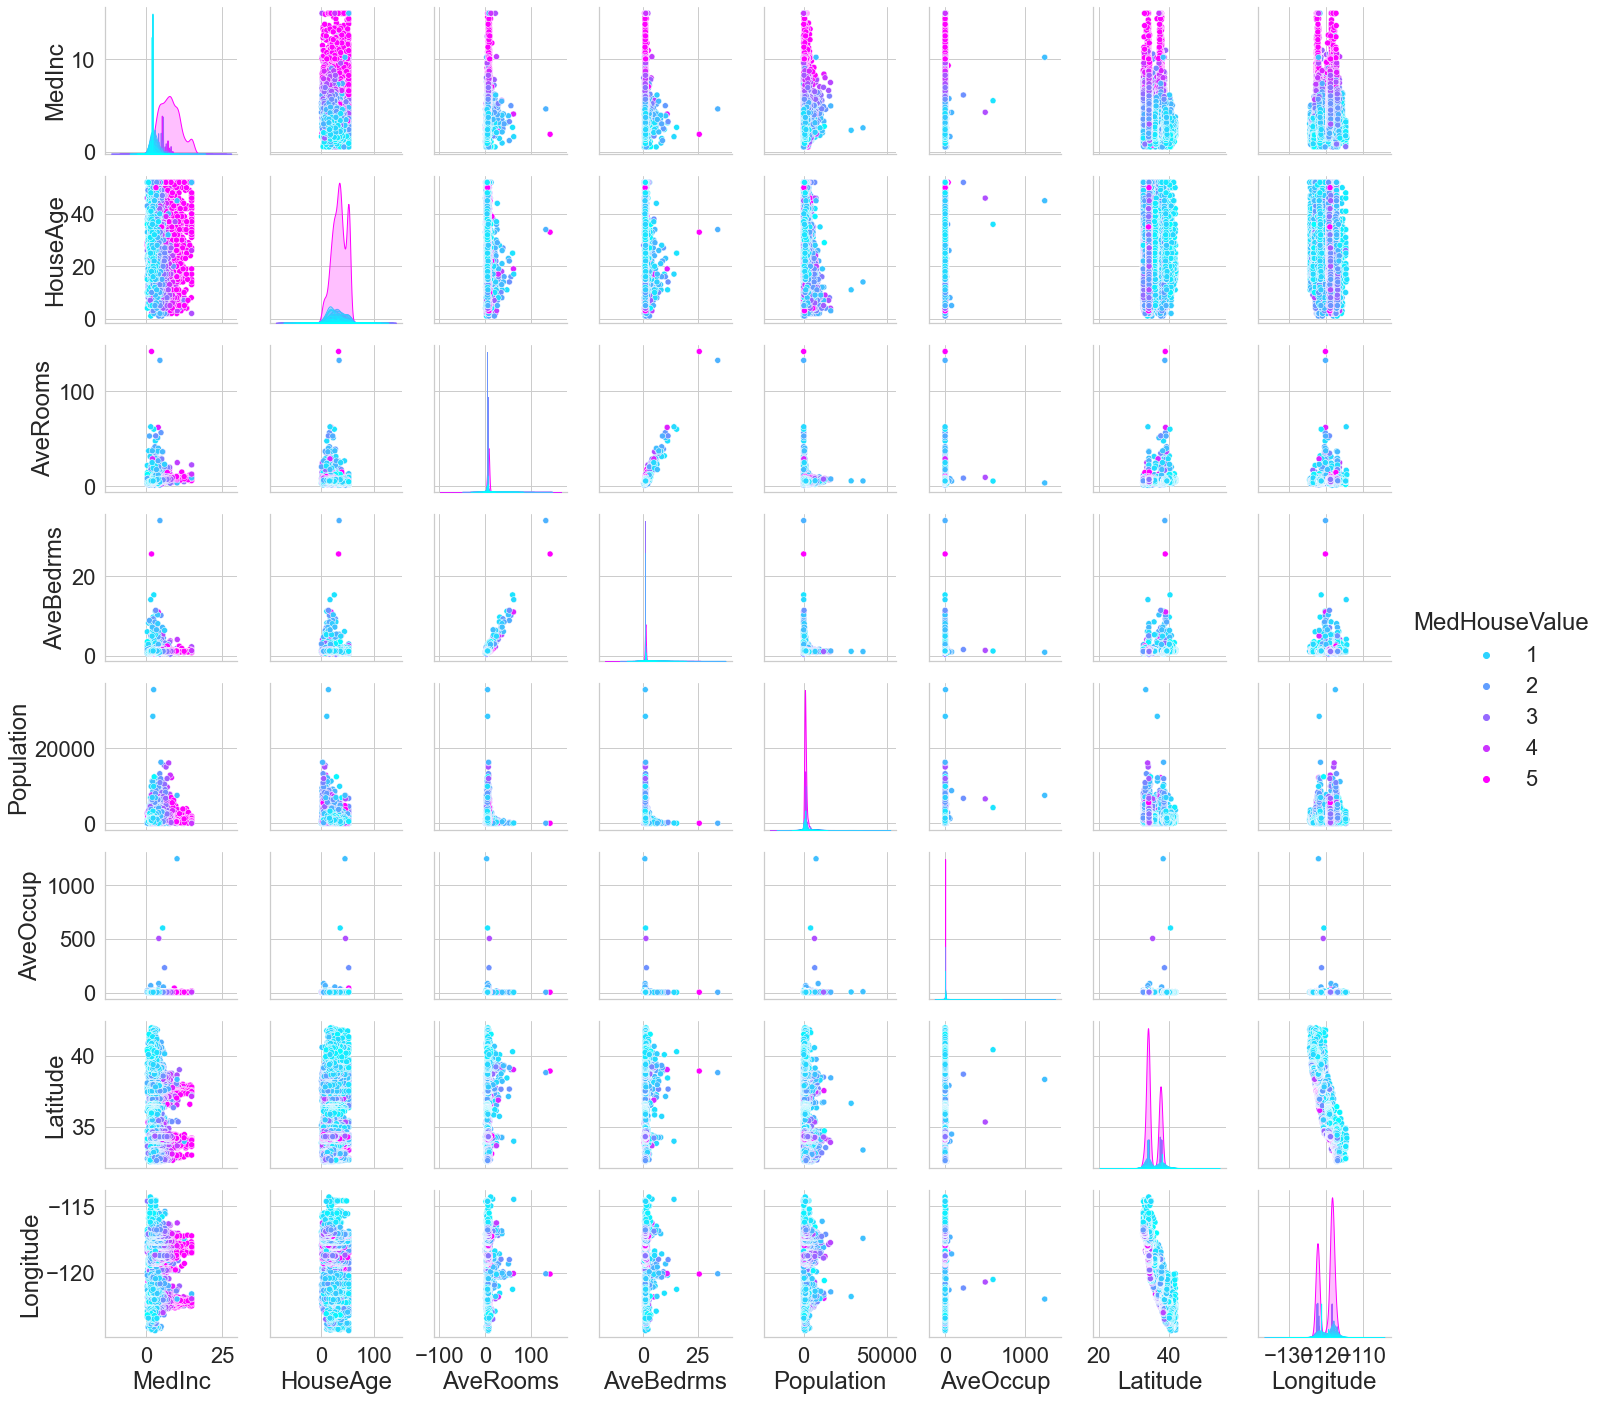

In [91]:
grid = sns.pairplot(data=california_df, vars=california.feature_names, hue='MedHouseValue', palette='cool')

In [92]:
grid.savefig("california.png")